# Capstone Project 1: Evaluation:

## Linear Regression, Random Forest & Decision Tree

In [1]:
# Import libraries:
import pandas as pd #for building pandas dataframes for analysis
import numpy as np #fundamental package for scientific computing with Python

# Plotting/Visualizations:
import seaborn as sns #for neat visualizations
import matplotlib.pyplot as plt #for visualizations
import datetime
import pylab as P

# Classical Stats Modeling:
import statsmodels.api as sm #provides estimation of many different statistical models, tests and data exploration 
import scipy.stats as stats #large number of probability distributions and statistical functions

# Supervised Learning:
from sklearn.model_selection import train_test_split #for performing train test split analysis
from sklearn.linear_model import LinearRegression #for performing linear regression
from sklearn.metrics import r2_score # Calculte R^2
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

/Users/carolinerosefrensko/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/carolinerosefrensko/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/carolinerosefrensko/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This m

In [2]:
#Cleaned Data w/o Accommodates
filtered_result4 = pd.read_csv('/Users/carolinerosefrensko/Downloads/data_wrangling_json/AirBNB_cleaned_dataChicagoprice2018-07-11.csv')
filtered_result4.head()

,bedrooms,minstay,overall_satisfaction,price,reviews,City_Chicago,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighborhood_Albany Park,...,neighborhood_West Pullman,neighborhood_West Rogers Park,neighborhood_West Town,neighborhood_West Woodlawn,neighborhood_Wicker Park,neighborhood_Wildwood,neighborhood_Woodlawn,neighborhood_Wrightwood,neighborhood_Wrightwood Neighbors,neighborhood_Wrigleyville
0,3.0,2.0,5.0,98.0,186,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.0,4.0,4.5,296.0,46,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1.0,3.0,5.0,108.0,50,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,4.0,4.5,217.0,9,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,1.0,4.5,433.0,34,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
filtered_result4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90223 entries, 0 to 90222
Columns: 198 entries, bedrooms to neighborhood_Wrigleyville
dtypes: float64(4), int64(194)
memory usage: 136.3 MB


### Linear Regression

#### Fit the Model

Here,
$Y$ = overall_satisfaction (called "target" data in python, and referred to as the dependent variable or response variable)
and
$X$ = all the other features (or independent variables, predictors or explanatory variables)
which we will use to fit a linear regression model and predict overall satisfaction.

In [4]:
#Filtering out Price Column out of X
X = filtered_result4.drop('price', axis = 1)
names = filtered_result4.drop('price', axis = 1).columns

#Overall_Satisfaction Column
Y = filtered_result4.price

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state= 42)

# This Creates a LinearRegression Object
lm = LinearRegression()

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

#Normalize
#X = preprocessing.StandardScaler().fit_transform(X)
models = []

#Fitting Linear Regression using Sklearn
model = lm.fit(X_train, y_train)
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

(72178, 197)
(18045, 197)
(72178,)
(18045,)


#### Evaluating the Model: Sum of Squares

Linear Regression R squared Train Set: 0.5341
Linear Regression Root Mean Squared Error Train Set: 50.5862
Linear Regression MAE Train Set: 34.4772
Linear Regression R squared Test Set: 0.5284
Linear Regression Root Mean Squared Error Test Set: 51.4019
Linear Regression MAE Test Set: 34.8128


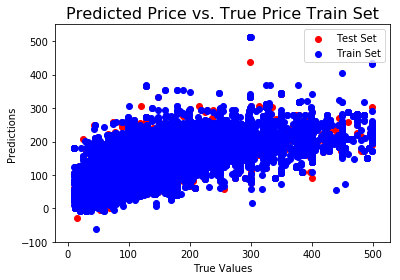

In [5]:
#R^2: Coefficient of determination (R^2). A measure of how well observed outcomes are replicated by the model, 
#as the proportion of total variation of outcomes explained by the model. 
print('Linear Regression R squared Train Set: %.4f' % model.score(X_train, y_train))

lin_mse = mean_squared_error(y_train, y_pred_train)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression Root Mean Squared Error Train Set: %.4f' % lin_rmse)

lin_mae = mean_absolute_error(y_pred_train, y_train)
print('Linear Regression MAE Train Set: %.4f' % lin_mae)

#R^2: Coefficient of determination (R^2). A measure of how well observed outcomes are replicated by the model, 
#as the proportion of total variation of outcomes explained by the model. 
print('Linear Regression R squared Test Set: %.4f' % model.score(X_test, y_test))

lin_mse = mean_squared_error(y_test, y_pred_test)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression Root Mean Squared Error Test Set: %.4f' % lin_rmse)

lin_mae = mean_absolute_error(y_pred_test, y_test)
print('Linear Regression MAE Test Set: %.4f' % lin_mae)

## The line / model
plt.scatter(y_test, y_pred_test, color='red',
    label="Test Set")
plt.scatter(y_train, y_pred_train, color='blue',
    label="Train Set")
    
plt.legend()

plt.title("Predicted Price vs. True Price Train Set", fontsize=16)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

#### Predicted Price for Test Set

In [6]:
# first five predicted prices
lm.predict(X_test)[0:10]

array([  64.34213257,  102.26937866,   44.91397095,  180.08151245,
         52.75018311,  134.97009277,  130.72216797,  117.67651367,
        123.2855835 ,  137.44793701])

#### Histogram of Predicted Price for Test Set

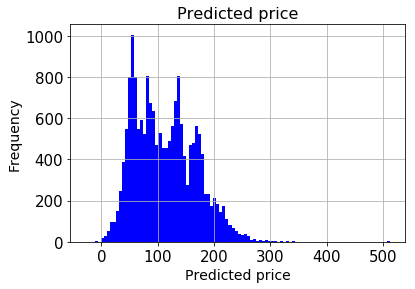

Mean predicted price: 112.504204025
Standard deviation of price: 54.1804247734


In [7]:
plt.hist(lm.predict(X_test), 100, facecolor='blue', align='mid')
plt.title("Predicted price", fontsize=16)
P.rc("axes", linewidth=2.0)
P.rc("lines", markeredgewidth=2.0) 
plt.xlabel('Predicted price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
P.xticks(fontsize=15)
P.yticks(fontsize=15)
plt.grid(True)
plt.savefig('PredictPrice_histogram.eps', facecolor='b', edgecolor='b', format='eps')
plt.show()
print('Mean predicted price:', np.mean(lm.predict(X)))
print('Standard deviation of price:', np.std(lm.predict(X)))


The predicted price follow a pretty normal distribution skewed to the right (mean of 118.81 and a standard deviation of 66.61).

#### Residual Plot of Train (Blue) and Test (Green) Sets

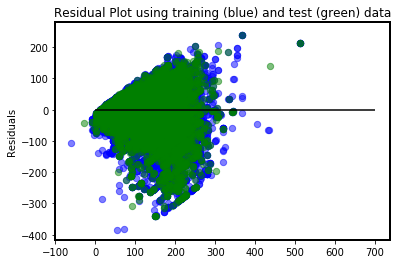

In [8]:
plt.scatter(lm.predict(X_train), lm.predict(X_train)-y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test)-y_test, c='g', s=40, alpha=0.5)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.hlines(y=0, xmin=0, xmax=700)
plt.ylabel('Residuals')
plt.show()

Residual plots are a good way to visualize the errors in data. If it is accurate the data should be randomly scattered around line zero. In this case there are a few points outside of the data. This means the model is not capturing something. Maybe there is a interaction between 2 variables not considered, or maybe there is measurement of time dependent data. I will need to check the model parameters.

##### Histogram of the Residual Error of the Test Set

In [9]:
residual_error= y_pred_test-y_test
error_mean = np.mean(residual_error)
error_sigma = np.std(residual_error)

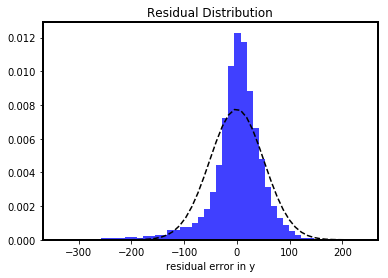

In [10]:
n, bins, patches = plt.hist(residual_error, 50, normed=1, facecolor='blue', alpha=0.75)
y_pdf = P.normpdf( bins, error_mean, error_sigma)
l = P.plot(bins, y_pdf, 'k--', linewidth=1.5)
plt.xlabel("residual error in y")
plt.title("Residual Distribution")
plt.show()

The residual error is mostly normally distributed and centered around zero. 

In [11]:
def percent_within_x(y_pred_test, y_test, x):
    err_arr = 100.*(y_pred_test-y_test)/y_test
    tmp = []
    for num in err_arr:
        if np.abs(num) < x:
            tmp.append(num)
    return 100.*(len(tmp)/float(len(err_arr)))

def median_error(y_pred_test, y_test):
    err_arr = 100.*(y_pred_test-y_test)/y_test
    return np.median(np.abs(err_arr))

def print_percents(y_pred_test, y_true):
    print ('Percent within 5 of price: %0.3f' %(percent_within_x(y_pred_test, y_true, 5)))
    print ('Percent within 10 of price: %0.3f' %(percent_within_x(y_pred_test, y_true, 10)))
    print ('Percent within 20 of price: %0.3f' %(percent_within_x(y_pred_test, y_true, 20)))
    print('')
    print ('Median error (percent): %0.3f' %(median_error(y_pred_test, y_true)))
    print('')

In [12]:
print(print_percents(y_pred_test, y_test))

Percent within 5 of price: 10.540
Percent within 10 of price: 21.086
Percent within 20 of price: 40.288

Median error (percent): 25.403

None


#### Probability Plot with Adjusted Values

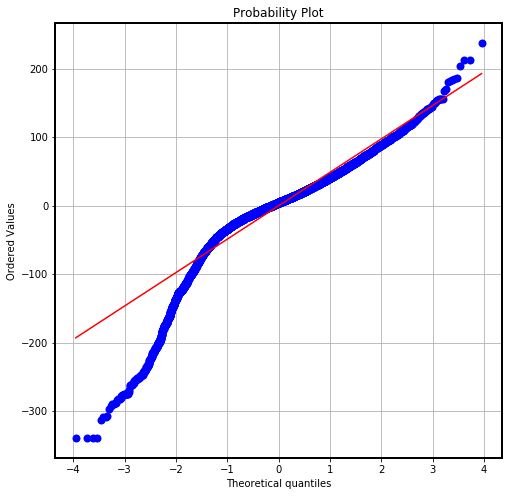

In [13]:
from scipy.stats import probplot
residual_error= y_pred_test-y_test
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
_ = probplot((residual_error), plot=ax)

plt.grid(True)
plt.show()

This chart demonstrates that the residuals are not normal, especially at either end. The data shows more extreme values than expected for a normal distribution. The extreme values should be removed or another model should be used. The advantage of the fitted vs. residual plot is that the model how it performs on each individual case. The advantage of the quantile plot is that it summarizes the model's performance and shows how close the residuals are to a normal distribution.
Outliers are seen forming a group in the upper right side of the fitted vs. residuals plot. These outliers are also seen in the upper right side of the quantile plot.

In [14]:
fits = y_pred_test
resids = residual_error
highresids = residual_error > 200  # outliers from quantile plot
lowresids = residual_error <-100
X_test[highresids]

,bedrooms,minstay,overall_satisfaction,reviews,City_Chicago,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighborhood_Albany Park,neighborhood_Andersonville,...,neighborhood_West Pullman,neighborhood_West Rogers Park,neighborhood_West Town,neighborhood_West Woodlawn,neighborhood_Wicker Park,neighborhood_Wildwood,neighborhood_Woodlawn,neighborhood_Wrightwood,neighborhood_Wrightwood Neighbors,neighborhood_Wrigleyville
37173,6.0,7.0,5.0,31,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86011,10.0,1.0,5.0,13,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
410,4.0,1.0,4.0,25,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78192,10.0,1.0,5.0,13,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [15]:
X_test[lowresids].head()

,bedrooms,minstay,overall_satisfaction,reviews,City_Chicago,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighborhood_Albany Park,neighborhood_Andersonville,...,neighborhood_West Pullman,neighborhood_West Rogers Park,neighborhood_West Town,neighborhood_West Woodlawn,neighborhood_Wicker Park,neighborhood_Wildwood,neighborhood_Woodlawn,neighborhood_Wrightwood,neighborhood_Wrightwood Neighbors,neighborhood_Wrigleyville
1070,2.0,3.0,5.0,8,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82301,0.0,1.0,5.0,9,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
53376,1.0,1.0,5.0,28,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53559,0.0,1.0,4.5,18,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78134,3.0,1.0,5.0,37,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
X_test.describe()

,bedrooms,minstay,overall_satisfaction,reviews,City_Chicago,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighborhood_Albany Park,neighborhood_Andersonville,...,neighborhood_West Pullman,neighborhood_West Rogers Park,neighborhood_West Town,neighborhood_West Woodlawn,neighborhood_Wicker Park,neighborhood_Wildwood,neighborhood_Woodlawn,neighborhood_Wrightwood,neighborhood_Wrightwood Neighbors,neighborhood_Wrigleyville
count,18045.000000,18045.000000,18045.000000,18045.00000,18045.0,18045.000000,18045.000000,18045.000000,18045.000000,18045.000000,...,18045.0,18045.000000,18045.000000,18045.000000,18045.000000,18045.000000,18045.000000,18045.000000,18045.000000,18045.000000
mean,1.291992,1.642283,4.765614,27.45852,1.0,0.569521,0.394735,0.035744,0.010751,0.005542,...,0.0,0.010308,0.038293,0.002549,0.023441,0.000055,0.005209,0.000166,0.008091,0.012413
std,0.754742,6.128175,0.344456,35.64679,0.0,0.495157,0.488807,0.185656,0.103131,0.074238,...,0.0,0.101004,0.191908,0.050426,0.151305,0.007444,0.071989,0.012893,0.089587,0.110725
min,0.000000,1.000000,0.000000,3.00000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,4.500000,6.00000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,5.000000,14.00000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,5.000000,33.00000,1.0,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,360.000000,5.000000,427.00000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
X_test[highresids].describe() #Outliers

,bedrooms,minstay,overall_satisfaction,reviews,City_Chicago,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighborhood_Albany Park,neighborhood_Andersonville,...,neighborhood_West Pullman,neighborhood_West Rogers Park,neighborhood_West Town,neighborhood_West Woodlawn,neighborhood_Wicker Park,neighborhood_Wildwood,neighborhood_Woodlawn,neighborhood_Wrightwood,neighborhood_Wrightwood Neighbors,neighborhood_Wrigleyville
count,4.0,4.0,4.00,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.00000
mean,7.5,2.5,4.75,20.5,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.50000
std,3.0,3.0,0.50,9.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.57735
min,4.0,1.0,4.00,13.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
25%,5.5,1.0,4.75,13.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
50%,8.0,1.0,5.00,19.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.50000
75%,10.0,2.5,5.00,26.5,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00000
max,10.0,7.0,5.00,31.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00000


In [18]:
y_test[highresids][0:20]

37173    129.0
86011    299.0
410       44.0
78192    299.0
Name: price, dtype: float64

In [19]:
X_test[lowresids].describe() #Outliers

,bedrooms,minstay,overall_satisfaction,reviews,City_Chicago,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighborhood_Albany Park,neighborhood_Andersonville,...,neighborhood_West Pullman,neighborhood_West Rogers Park,neighborhood_West Town,neighborhood_West Woodlawn,neighborhood_Wicker Park,neighborhood_Wildwood,neighborhood_Woodlawn,neighborhood_Wrightwood,neighborhood_Wrightwood Neighbors,neighborhood_Wrigleyville
count,798.000000,798.000000,798.000000,798.000000,798.0,798.000000,798.000000,798.000000,798.000000,798.000000,...,798.0,798.0,798.000000,798.0,798.000000,798.0,798.0,798.0,798.000000,798.000000
mean,1.926065,1.634085,4.756266,16.423559,1.0,0.933584,0.063910,0.002506,0.005013,0.001253,...,0.0,0.0,0.041353,0.0,0.025063,0.0,0.0,0.0,0.013784,0.032581
std,1.008519,1.612822,0.403628,21.196601,0.0,0.249164,0.244746,0.050031,0.070666,0.035400,...,0.0,0.0,0.199231,0.0,0.156413,0.0,0.0,0.0,0.116668,0.177650
min,0.000000,1.000000,0.000000,3.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
25%,1.000000,1.000000,4.500000,4.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
50%,2.000000,1.000000,5.000000,8.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
75%,2.000000,2.000000,5.000000,19.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
max,5.000000,30.000000,5.000000,158.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,0.0,1.000000,0.0,1.000000,0.0,0.0,0.0,1.000000,1.000000


In [20]:
y_test[lowresids][0:20]

1070     331.0
82301    200.0
53376    300.0
53559    250.0
78134    399.0
37884    334.0
81869    339.0
36864    299.0
50633    450.0
63633    250.0
45616    295.0
49715    395.0
22638    300.0
28977    334.0
39331    325.0
86249    499.0
56279    300.0
1480     281.0
53201    380.0
58815    289.0
Name: price, dtype: float64

In [21]:
#identify neighborhoods of residuals above 210
data = X_test[highresids]
df1 = data.loc[:, data.columns.str.startswith('neighborhood')]
df2 = df1.loc[df1.eq(1).any(1), df1.eq(1).any(0)]
df2

,neighborhood_Gold Coast,neighborhood_Near West Side,neighborhood_Wrigleyville
37173,1,0,0
86011,0,0,1
410,0,1,0
78192,0,0,1


In [22]:
#Identify neighborhoods with low residuals
data = X_test[lowresids]
df1 = data.loc[:, data.columns.str.startswith('neighborhood')]
df2 = df1.loc[df1.eq(1).any(1), df1.eq(1).any(0)]
df2.head()

,neighborhood_Albany Park,neighborhood_Andersonville,neighborhood_Avondale,neighborhood_Bronzeville,neighborhood_Bucktown,neighborhood_Budlong Woods,neighborhood_Buena Park,neighborhood_Cabrini Green,neighborhood_Dearborn Park,neighborhood_East Garfield Park,...,neighborhood_The Loop,neighborhood_Ukrainian Village,neighborhood_University Village / Little Italy,neighborhood_Uptown,neighborhood_West De Paul,neighborhood_West Loop Gate,neighborhood_West Town,neighborhood_Wicker Park,neighborhood_Wrightwood Neighbors,neighborhood_Wrigleyville
1070,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82301,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
53376,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53559,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78134,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Feature Importance Analysis

In [23]:
#Filtering out Price Column out of X
X = filtered_result4.drop('price', axis = 1)
names = filtered_result4.drop('price', axis = 1).columns

#Overall_Satisfaction Column
Y = filtered_result4.price

#Normalize
#X = preprocessing.StandardScaler().fit_transform(X)
models = []

#Standardize for Coef Analysis
#ss = StandardScaler()
#Xs = ss.fit_transform(X)
Xscaled = scale(X)

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(Xscaled, Y, test_size=0.20, random_state= 42)

# This Creates a LinearRegression Object
lm = LinearRegression()

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

#Fitting Linear Regression using Sklearn
model = lm.fit(X_train, y_train)
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

(72178, 197)
(18045, 197)
(72178,)
(18045,)


In [24]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))
print('Number of coefficients: {}'.format(len(lm.coef_)))
coefficients = pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]
coefficients.head(10)

Estimated intercept coefficient: 112.43008993655594
Number of coefficients: 197


,features,estimatedCoefficients
0,bedrooms,3.074352e+01
1,minstay,-1.230976e+00
2,overall_satisfaction,4.928982e+00
3,reviews,-5.221767e+00
4,City_Chicago,2.770996e+14
5,room_type_Entire home/apt,1.383654e+12
6,room_type_Private room,1.365980e+12
7,room_type_Shared room,5.194059e+11
8,neighborhood_Albany Park,-1.574134e+12
9,neighborhood_Andersonville,-1.086407e+12


In [25]:
positives = coefficients[coefficients>0].sort_values(by=['estimatedCoefficients'], axis=0, ascending=False)
positives.head()

,features,estimatedCoefficients
4,City_Chicago,2.770996e+14
40,neighborhood_Dunning,1.967066e+14
169,neighborhood_The Robert Taylor Homes,1.760332e+14
36,neighborhood_Cottage Grove Heights,1.117356e+14
46,neighborhood_East Side,9.193763e+13


In [26]:
negatives = coefficients[coefficients<0].sort_values(by=['estimatedCoefficients'], axis=0, ascending=True)
negatives.head()

,features,estimatedCoefficients
87,neighborhood_Kelvin Park,-3.000994e+14
33,neighborhood_Chicago Lawn,-2.654045e+14
105,neighborhood_Marquette Park,-9.595780e+13
84,neighborhood_Jackson Park Highlands,-3.418601e+13
101,neighborhood_Longwood Manor,-1.818702e+13


In [27]:
negatives2 = (negatives['estimatedCoefficients'].abs()).rename('estimatedCoefficientsabs')
negatives3 = pd.concat([negatives, negatives2], axis=1)
negatives3 = negatives3.drop(['estimatedCoefficients'], axis=1)
negatives3.head()

,features,estimatedCoefficientsabs
87,neighborhood_Kelvin Park,3.000994e+14
33,neighborhood_Chicago Lawn,2.654045e+14
105,neighborhood_Marquette Park,9.595780e+13
84,neighborhood_Jackson Park Highlands,3.418601e+13
101,neighborhood_Longwood Manor,1.818702e+13


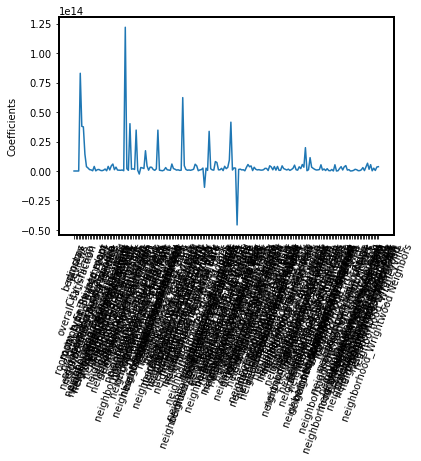

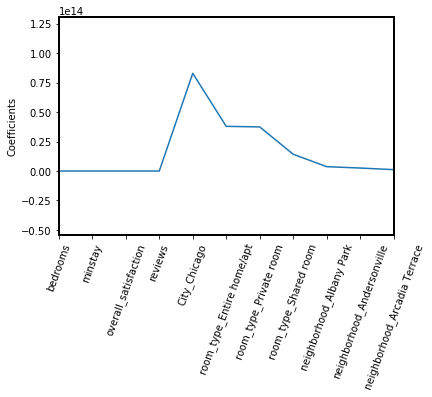

In [32]:
###Coefficient mapping:

names = filtered_result4.drop('price', axis = 1).columns

lm = LinearRegression()
lm_coef = lm.fit(Xscaled,Y).coef_
_ = plt.plot(range(len(names)),lm_coef)
_ = plt.xticks(range(len(names)),names,rotation=70)
_ = plt.ylabel('Coefficients')
_ = plt.show()

lm = LinearRegression()
lm_coef = lm.fit(Xscaled,Y).coef_
_ = plt.plot(range(len(names)),lm_coef)
_ = plt.xticks(range(len(names)),names,rotation=70)
_ = plt.ylabel('Coefficients')
_ = plt.xlim(0, 10)
_ = plt.show()

In [28]:
#Join All Coefficients
#coefficients = [positives, negatives3]
#result = pd.concat(coefficients)
#result.head()

In [29]:
#result = result.sort_values('estimatedCoefficients',ascending=False).set_index('features')
#result.head()

In [31]:
#importances = pd.DataFrame({'feature':names,'importance':np.round(regr_forest.feature_importances_,4)})
#importances = importances.sort_values('importance',ascending=False).set_index('feature')
#print(importances[0:30])

## Random Forest

Train Set
Random Forest R squared Train: 0.4574
Random Forest RMSE Train: 54.5889
Gradient Boosting MAE Train Set: 37.4954
Test Set
Random Forest R squared Test Set: 0.4476
Random Forest RMSE Test Set: 55.6348
Gradient Boosting MAE Test Set: 38.2314
Percents
Percent within 5 of price: 8.761
Percent within 10 of price: 18.764
Percent within 20 of price: 36.459

Median error (percent): 28.506

None


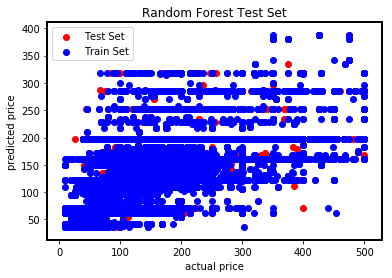

In [32]:
#Filtering out Price Column out of X
X = filtered_result4.drop('price', axis = 1)
names = filtered_result4.drop('price', axis = 1).columns

#Overall_Satisfaction Column
Y = filtered_result4.price

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state= 42)
regr_forest = RandomForestRegressor(max_depth=5, random_state=42)

#Fitting Random Forest using Sklearn
regr_forest.fit(X_train, y_train)
y_pred_test = regr_forest.predict(X_test)
y_pred_train = regr_forest.predict(X_train)


print('Train Set')
print('Random Forest R squared Train: %.4f' % regr_forest.score(X_train, y_train))
forest_mse = mean_squared_error(y_pred_train, y_train)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE Train: %.4f' % forest_rmse)
lin_mae = mean_absolute_error(y_pred_train, y_train)
print('Gradient Boosting MAE Train Set: %.4f' % lin_mae)

print('Test Set')
print('Random Forest R squared Test Set: %.4f' % regr_forest.score(X_test, y_test))
forest_mse = mean_squared_error(y_pred_test, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE Test Set: %.4f' % forest_rmse)
lin_mae = mean_absolute_error(y_pred_test, y_test)
print('Gradient Boosting MAE Test Set: %.4f' % lin_mae)
print('Percents')

print(print_percents(y_pred_test, y_test))

plt.scatter(x=y_test, y=y_pred_test, color='red', label="Test Set")
plt.scatter(x=y_train, y=y_pred_train, color= 'blue', label="Train Set")
plt.legend()
plt.title('Random Forest Test Set')
plt.ylabel('predicted price')
plt.xlabel('actual price')
plt.show()

#### Feature Importance Analysis:

In [33]:
#Filtering out Price Column out of X
X = filtered_result4.drop('price', axis = 1)
names = filtered_result4.drop('price', axis = 1).columns

#Overall_Satisfaction Column
Y = filtered_result4.price

#Standardize for Feature Impotance
Xscaled = scale(X)

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(Xscaled, Y, test_size=0.20, random_state= 42)

#Fitting Random Forest using Sklearn
regr_forest.fit(X_train, y_train)
y_pred_test = regr_forest.predict(X_test)
y_pred_train = regr_forest.predict(X_train)

In [34]:
importances = pd.DataFrame({'feature':names,'importance':np.round(regr_forest.feature_importances_,4)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
print(importances[0:30])

                                        importance
feature                                           
room_type_Entire home/apt                   0.6599
bedrooms                                    0.2596
neighborhood_Near North                     0.0296
neighborhood_The Loop                       0.0091
overall_satisfaction                        0.0069
reviews                                     0.0053
room_type_Private room                      0.0051
neighborhood_River North                    0.0036
room_type_Shared room                       0.0036
neighborhood_South Loop                     0.0030
neighborhood_Near East Side                 0.0030
neighborhood_Old Town Triangle              0.0025
neighborhood_Old Town                       0.0020
neighborhood_Gold Coast                     0.0012
minstay                                     0.0011
neighborhood_Illinois Medical District      0.0010
neighborhood_North Center                   0.0008
neighborhood_Uptown            

#There are a few things to keep in mind when using the impurity based ranking. Firstly, feature selection based on impurity reduction is biased towards preferring variables with more categories (see Bias in random forest variable importance measures). Secondly, when the dataset has two (or more) correlated features, then from the point of view of the model, any of these correlated features can be used as the predictor, with no concrete preference of one over the others. But once one of them is used, the importance of others is significantly reduced since effectively the impurity they can remove is already removed by the first feature. As a consequence, they will have a lower reported importance. This is not an issue when we want to use feature selection to reduce overfitting, since it makes sense to remove features that are mostly duplicated by other features. But when interpreting the data, it can lead to the incorrect conclusion that one of the variables is a strong predictor while the others in the same group are unimportant, while actually they are very close in terms of their relationship with the response variable.

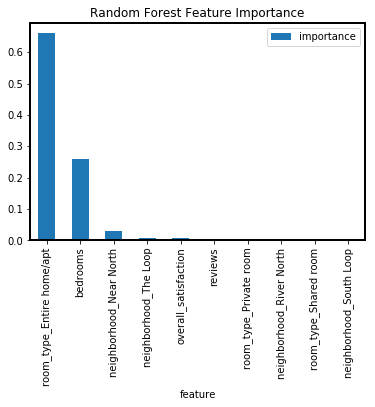

In [35]:
(importances[0:10]).plot.bar()
plt.title('Random Forest Feature Importance')
plt.show()

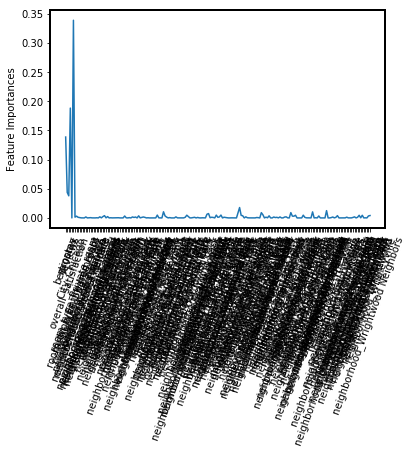

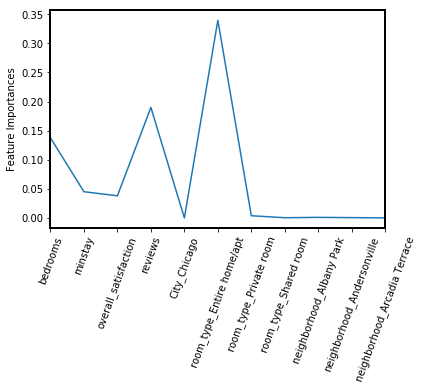

In [35]:
###Feature Importance Mapping:

names = filtered_result4.drop('price', axis = 1).columns

rfr = RandomForestRegressor()
rfr_feature_importances_ = rfr.fit(Xscaled,Y).feature_importances_
_ = plt.plot(range(len(names)),rfr_feature_importances_)
_ = plt.xticks(range(len(names)),names,rotation=70)
_ = plt.ylabel('Feature Importances')
_ = plt.show()

rfr = RandomForestRegressor()
rfr_feature_importances_ = rfr.fit(Xscaled,Y).feature_importances_
_ = plt.plot(range(len(names)),rfr_feature_importances_)
_ = plt.xticks(range(len(names)),names,rotation=70)
_ = plt.ylabel('Feature Importances')
_ = plt.xlim(0, 10)
_ = plt.show()

#### Residual Analysis

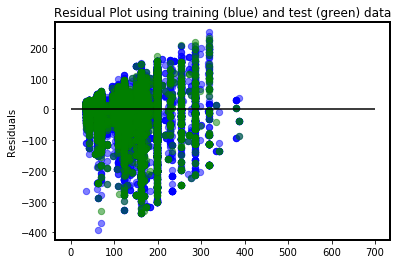

In [36]:
plt.scatter(regr_forest.predict(X_train), regr_forest.predict(X_train)-y_train, c='b', s=40, alpha=0.5)
plt.scatter(regr_forest.predict(X_test), regr_forest.predict(X_test)-y_test, c='g', s=40, alpha=0.5)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.hlines(y=0, xmin=0, xmax=700)
plt.ylabel('Residuals')
plt.show()

In [37]:
residual_error= y_pred_test-y_test
error_mean = np.mean(residual_error)
error_sigma = np.std(residual_error)

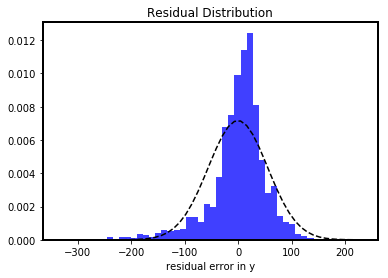

In [38]:
n, bins, patches = plt.hist(residual_error, 50, normed=1, facecolor='blue', alpha=0.75)
y_pdf = P.normpdf( bins, error_mean, error_sigma)
l = P.plot(bins, y_pdf, 'k--', linewidth=1.5)
plt.xlabel("residual error in y")
plt.title("Residual Distribution")
plt.show()

In [39]:
def percent_within_x(y_pred_test, y_test, x):
    err_arr = 100.*(y_pred_test-y_test)/y_test
    tmp = []
    for num in err_arr:
        if np.abs(num) < x:
            tmp.append(num)
    return 100.*(len(tmp)/float(len(err_arr)))

def median_error(y_pred_test, y_test):
    err_arr = 100.*(y_pred_test-y_test)/y_test
    return np.median(np.abs(err_arr))

def print_percents(y_pred_test, y_true):
    print ('Percent within 5 of price: %0.3f' %(percent_within_x(y_pred_test, y_true, 5)))
    print ('Percent within 10 of price: %0.3f' %(percent_within_x(y_pred_test, y_true, 10)))
    print ('Percent within 20 of price: %0.3f' %(percent_within_x(y_pred_test, y_true, 20)))
    print('')
    print ('Median error (percent): %0.3f' %(median_error(y_pred_test, y_true)))
    print('')

In [40]:
print(print_percents(y_pred_test, y_test))

Percent within 5 of price: 8.761
Percent within 10 of price: 18.764
Percent within 20 of price: 36.459

Median error (percent): 28.506

None


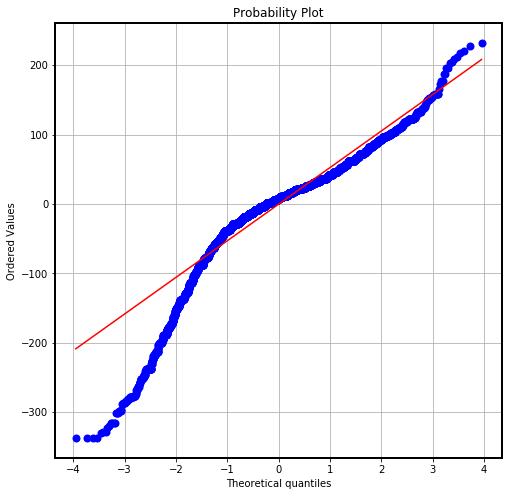

In [41]:
from scipy.stats import probplot
residual_error= y_pred_test-y_test
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
_ = probplot((residual_error), plot=ax)

plt.grid(True)
plt.show()

In [42]:
fits = y_pred_test
resids = residual_error
highresids = residual_error > 200  # outliers from quantile plot
lowresids = residual_error <-100
X_test[highresids]

array([[ 4.96605729, -0.10922104,  0.6801439 , ..., -0.01289505,
        -0.09873177, -0.1066141 ],
       [ 0.95829985, -0.10922104, -2.19239552, ..., -0.01289505,
        -0.09873177, -0.1066141 ],
       [ 3.63013815, -0.10922104, -2.19239552, ..., -0.01289505,
        -0.09873177, -0.1066141 ],
       ..., 
       [ 0.95829985,  0.07067982,  0.6801439 , ..., -0.01289505,
        -0.09873177, -0.1066141 ],
       [ 0.95829985,  4.92800303, -0.75612581, ..., -0.01289505,
        -0.09873177, -0.1066141 ],
       [ 0.95829985, -0.10922104, -3.62866523, ..., -0.01289505,
        -0.09873177, -0.1066141 ]])

In [44]:
X_test[lowresids]

array([[ 0.95829985,  0.25058068,  0.6801439 , ..., -0.01289505,
        -0.09873177, -0.1066141 ],
       [-0.3776193 , -0.10922104,  0.6801439 , ..., -0.01289505,
        -0.09873177, -0.1066141 ],
       [-1.71353845, -0.10922104, -0.75612581, ..., -0.01289505,
        -0.09873177, -0.1066141 ],
       ..., 
       [ 0.95829985,  0.07067982,  0.6801439 , ..., -0.01289505,
        -0.09873177, -0.1066141 ],
       [ 2.294219  , -0.10922104, -0.75612581, ..., -0.01289505,
        -0.09873177, -0.1066141 ],
       [ 0.95829985, -0.10922104, -0.75612581, ..., -0.01289505,
        -0.09873177, -0.1066141 ]])